# Project 2 - Case Study of Spam_emails Dectection
=========

Use case
=========
   You were recently hired in start up company and you were asked to build a system to identify spam emails.

Perform all necessary actions not only limited to,

1. Data Preparation
2. Building word dictionary
3. Feature extraction
4. Training classifiers
5. Testing 
6. Performance evaluation using multiple metrics

# Importing Libraries

In [1]:
#Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string

# Load Data

In [2]:
#Read data
df=pd.read_csv('messages.csv')
#Check first 5rows using Head function
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


Let's explore the data to gain insights for better understanding of the data for the problem.

# Data Analysis

In [3]:
# Shape(rows & columns)
df.shape

(2893, 3)

In [4]:
#Features Names
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [5]:
#Print datatypes
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [6]:
# Duplicates 
df.duplicated().sum()

17

In [7]:
#Removing Duplicates
df.drop_duplicates(inplace=True)
#Print new_shape
df.shape

(2876, 3)

In [8]:
#Missing values
df.isna().sum()

subject    62
message     0
label       0
dtype: int64

In [9]:
#Subject
df['subject'].head()

0              job posting - apple-iss research center
1                                                  NaN
2    query : letter frequencies for text identifica...
3                                                 risk
4                             request book information
Name: subject, dtype: object

In [10]:
df['message']

0       content - length : 3386 apple-iss research cen...
1       lang classification grimes , joseph e . and ba...
2       i am posting this inquiry for sergei atamas ( ...
3       a colleague and i are researching the differin...
4       earlier this morning i was on the phone with a...
                              ...                        
2888    hello thanks for stopping by ! ! we have taken...
2889    the list owner of : " kiddin " has invited you...
2890    judging from the return post , i must have sou...
2891    gotcha ! there are two separate fallacies in t...
2892    hello ! i ' m working on a thesis concerning a...
Name: message, Length: 2876, dtype: object

In [11]:
print('Label:\n', df['label'].value_counts())

Label:
 0    2408
1     468
Name: label, dtype: int64


# Observations:
1). There are 2893-Rows & 3-Columns.

2).There are 17-Duplicated entries and 62-missing values in subject column.

3). The subject & message features are text while label has two values where 1:Spam & 0: not spam.


# Label data

In [12]:
# I Drop subject column as it tells the same story with message 
df.drop('subject',axis=1,inplace=True)

#confirm
df.shape

(2876, 2)

In [13]:
df.head(3)

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0


# Data Preparation/ Text Cleaning

Now Create a function to clean the text and return the tokens. The cleaning of the text can be done by first removing punctuation and then removing the useless words also known as stop words.

In [14]:
#First download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lklqy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#Creating function
def process(text):
  #Removing punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    #Cleaning the text/Removing stopwords
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['message'].head().apply(process)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

# Word Cloud

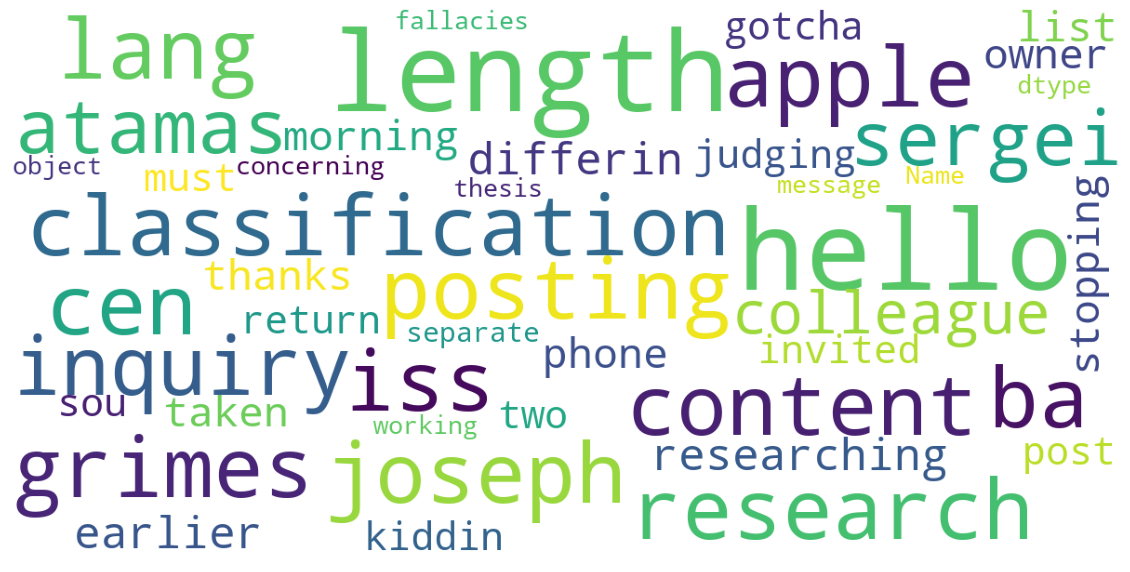

In [16]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["message"])

# Converting the text into a matrix of token counts 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['message'])

# Splitting the data 

Here,I split the data into training and testing sets, and then I use this one row of data for testing to make our prediction later on and test to see if the prediction matches with the actual value.

In [18]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message, df['label'], test_size=0.20, random_state=0)
# To see the shape of the data
print(message.shape)

(2876, 64661)


# Create Multinomial Naive Bayes Classifier
Suitable for classification with discrete Features

In [19]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

# classifiers prediction and actual values on the data set

In [20]:
print(classifier.predict(X_train))
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Evaluating Algorithm

Now let’s see how well our model performed by evaluating the Naive Bayes classifier and the report, confusion matrix & accuracy score.

In [21]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1914
           1       0.99      0.99      0.99       386

    accuracy                           1.00      2300
   macro avg       0.99      1.00      1.00      2300
weighted avg       1.00      1.00      1.00      2300



In [22]:
#Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_train, pred))

Confusion Matrix: 
 [[1910    4]
 [   2  384]]


In [23]:
# Accuracy score
print("Accuracy: \n", accuracy_score(y_train, pred))

Accuracy: 
 0.9973913043478261


# Testing the model on Test dataset

Now, Let’s test the model on the test data set (X_test &  y_test) by printing the predicted value, and the actual value to see if the model can accurately classify the email text.

In [24]:
#print the predictions
print(classifier.predict(X_test))
#print the actual values
print(y_test.values)

[0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [25]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       494
           1       0.93      1.00      0.96        82

    accuracy                           0.99       576
   macro avg       0.97      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576



In [26]:
#Print confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[488   6]
 [  0  82]]


In [27]:
#Accuracy score
print("Accuracy: \n", accuracy_score(y_test, pred))

Accuracy: 
 0.9895833333333334


# Saving Model

In [28]:
# save the model to disk
import joblib
filename = 'NB_model.sav'
joblib.dump(classifier, filename)

['NB_model.sav']

# Concluding Remarks:
1). The model predicts very high accuracy score (i.e 98.95% accurate).

2). we can also use some other models to see if the prediction is as good as Naive Bayes.

3). I'll use SVM model for comparison in another notebook